## Import libraries

In [1]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Import Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

## Data Exploration

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Further look at null values

In [6]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent1 = train_data.isnull().sum() / len(train_data) * 100
percent2 = round(percent1, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percent2], axis=1, keys=['Total', 'Percentage'])  #Key is for columns labels
missing_data.head(5)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [7]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Feature Engineering

### Age and Sex

Text(0.5, 1.0, 'Male')

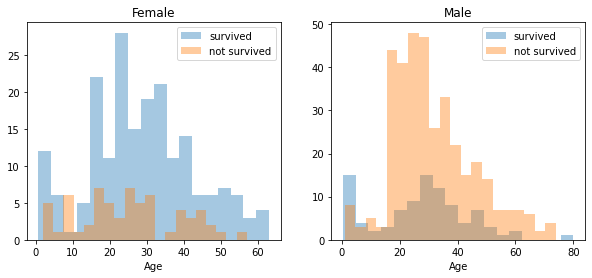

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))   #ncols gives us number of figures in a column way
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18,
                  label = survived, ax = axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20,
                 label = not_survived, ax = axes[0], kde= False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18,
                 label = survived, ax = axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20,
                 label = not_survived, ax = axes[1], kde=False)
ax.legend()
ax.set_title('Male')

### Embarked, Pclass and Sex

C:\Users\johna\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


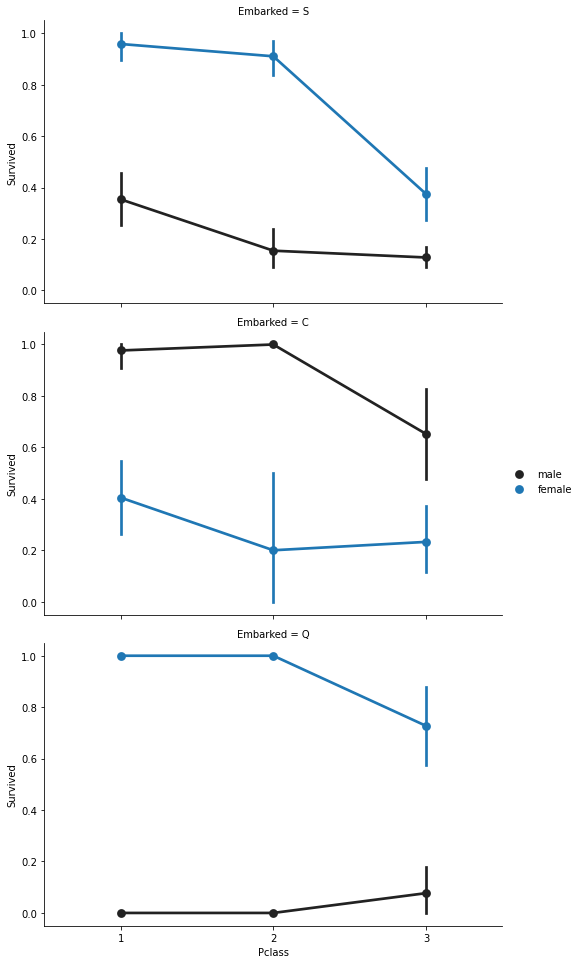

In [9]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',
             palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

### Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

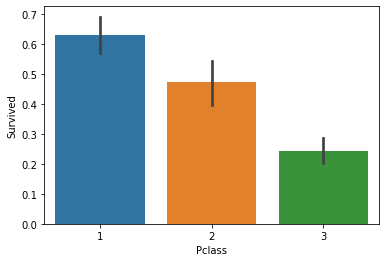

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

C:\Users\johna\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


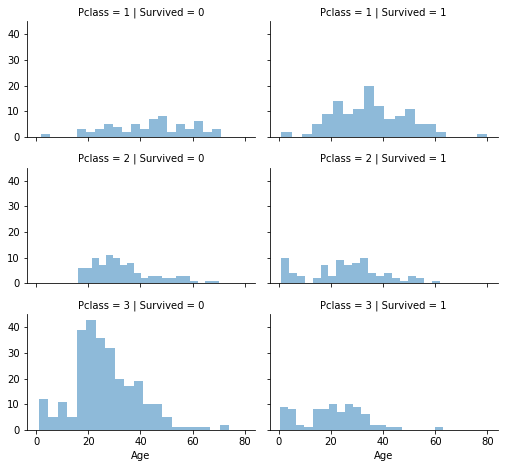

In [11]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass',
                    size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp and Parch

In [12]:
train_data['Source'] = 'Train'
test_data['Source'] = 'Test'
data = pd.concat([train_data, test_data], ignore_index=True)
data['relatives'] = data['SibSp'] + data['Parch']
data['not_alone'] = data['relatives'].apply(lambda x: 0 if x > 0 else 1)
train_data = data[data['Source']=='Train']

C:\Users\johna\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


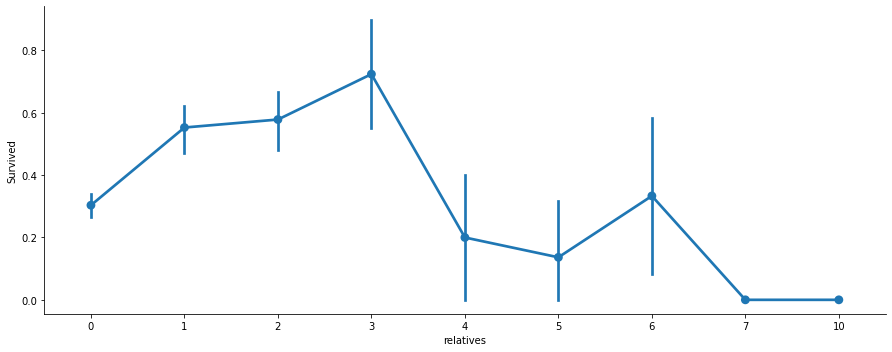

In [13]:
axes = sns.factorplot('relatives', 'Survived', 
                     data=train_data, aspect = 2.5, )

## Data Preprocessing

In [14]:
#Drop PassengerID column as it doesnt contribute in person's survival
train_data = train_data.drop(['PassengerId'], axis=1)

### Missing Data

In [15]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data['Cabin'] = data['Cabin'].fillna('U0')
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0).astype(int)

In [16]:
#Now we drop Cabin feature
data = data.drop(['Cabin'], axis=1)

In [17]:
#Age Feature
mean = train_data['Age'].mean()
std = train_data['Age'].std()
is_null = data['Age'].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std)

#Fill NAN Values with random number generated
age_slice = data['Age'].copy()
age_slice[np.isnan(age_slice)] = rand_age
data['Age'] = age_slice.astype(int)

In [18]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Source           0
relatives        0
not_alone        0
Deck             0
dtype: int64

In [19]:
data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [20]:
#Embarked featue, Fill it with the most common value
data['Age'] = data['Age'].fillna('S')

## Converting Features

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   int32  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  Source       1309 non-null   object 
 12  relatives    1309 non-null   int64  
 13  not_alone    1309 non-null   int64  
 14  Deck         1309 non-null   int32  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 143.3+ KB


In [22]:
#Fare, Convert from float to int64
data['Fare'] = data['Fare'].fillna(0).astype("int64")



In [23]:
#Name, we will use name feature to extract titles from the name so that we can build a new feature
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

#Convert titles into numbers
data['Title'] = data['Title'].map(titles)

#Filling NAN with 0, to get safe
data['Title'] = data['Title'].fillna(0)

data = data.drop(['Name'], axis=1)

In [24]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Source,relatives,not_alone,Deck,Title
0,1,0.0,3,male,22,1,0,A/5 21171,7,S,Train,1,0,8,1
1,2,1.0,1,female,38,1,0,PC 17599,71,C,Train,1,0,3,3
2,3,1.0,3,female,26,0,0,STON/O2. 3101282,7,S,Train,0,1,8,2
3,4,1.0,1,female,35,1,0,113803,53,S,Train,1,0,3,3
4,5,0.0,3,male,35,0,0,373450,8,S,Train,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,27,0,0,A.5. 3236,8,S,Test,0,1,8,1
1305,1306,NaN,1,female,39,0,0,PC 17758,108,C,Test,0,1,3,5
1306,1307,NaN,3,male,38,0,0,SOTON/O.Q. 3101262,7,S,Test,0,1,8,1
1307,1308,NaN,3,male,27,0,0,359309,8,S,Test,0,1,8,1


In [25]:
#Sex, Convert sex feature into numeric
genders = {'male':0, 'female':1}
data['Sex'] = data['Sex'].map(genders)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   int32  
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   int64  
 9   Embarked     1307 non-null   object 
 10  Source       1309 non-null   object 
 11  relatives    1309 non-null   int64  
 12  not_alone    1309 non-null   int64  
 13  Deck         1309 non-null   int32  
 14  Title        1309 non-null   int64  
dtypes: float64(1), int32(2), int64(9), object(3)
memory usage: 143.3+ KB


In [27]:
#Ticket, We will drop it from the data since it has too many unique values
data['Ticket'].describe()
data = data.drop(['Ticket'], axis=1)

In [28]:
#Embarked, Convert it into numeric feature
ports = {'S':0,
         'C':1,
         'Q':2}
data['Embarked'] = data['Embarked'].map(ports)

## Creating  Categories

In [29]:
#Convert Age type into int
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[ data['Age'] > 66, 'Age'] = 6

In [30]:
data['Age'].value_counts()

3    433
6    224
4    179
5    139
2    138
1    105
0     91
Name: Age, dtype: int64

In [31]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 99), 'Fare']   = 3
data.loc[(data['Fare'] > 99) & (data['Fare'] <= 250), 'Fare']   = 4
data.loc[ data['Fare'] > 250, 'Fare'] = 5
data['Fare'] = data['Fare'].astype(int)

## Creating new features

### Age times Class

In [32]:
data['Age_class'] = data['Age'] * data['Pclass']

### Fare per Person

In [33]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Source,relatives,not_alone,Deck,Title,Age_class
0,1,0.0,3,0,2,1,0,0,0.0,Train,1,0,8,1,6
1,2,1.0,1,1,5,1,0,3,1.0,Train,1,0,3,3,5
2,3,1.0,3,1,3,0,0,0,0.0,Train,0,1,8,2,9
3,4,1.0,1,1,5,1,0,3,0.0,Train,1,0,3,3,5
4,5,0.0,3,0,5,0,0,1,0.0,Train,0,1,8,1,15


In [34]:
data['Fare_per_person'] = data['Fare'] / (data['relatives']+1)
data['Fare_per_person'] = data['Fare_per_person'].astype(int)

In [35]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Source,relatives,not_alone,Deck,Title,Age_class,Fare_per_person
0,1,0.0,3,0,2,1,0,0,0.0,Train,1,0,8,1,6,0
1,2,1.0,1,1,5,1,0,3,1.0,Train,1,0,3,3,5,1
2,3,1.0,3,1,3,0,0,0,0.0,Train,0,1,8,2,9,0
3,4,1.0,1,1,5,1,0,3,0.0,Train,1,0,3,3,5,1
4,5,0.0,3,0,5,0,0,1,0.0,Train,0,1,8,1,15,1
5,6,0.0,3,0,3,0,0,1,2.0,Train,0,1,8,1,9,1
6,7,0.0,1,0,6,0,0,3,0.0,Train,0,1,5,1,6,3
7,8,0.0,3,0,0,3,1,2,0.0,Train,4,0,8,4,0,0
8,9,1.0,3,1,3,0,2,1,0.0,Train,2,0,8,3,9,0
9,10,1.0,2,1,1,1,0,2,1.0,Train,1,0,8,3,2,1


## Building ML Models

In [36]:
data['Embarked'] = data['Embarked'].fillna(0)


In [37]:
train_data = data[data['Source']=='Train']
test_data = data[data['Source']=='Test']
x_train = train_data.drop(['Survived', 'PassengerId', 'Source'], axis=1)
y_train = train_data['Survived']
x_test = test_data.drop(['PassengerId', 'Source', 'Survived'], axis=1)

### Stochastic Gradient Descent(SGD)

In [38]:
sgd = linear_model.SGDClassifier(max_iter=7, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
score = sgd.score(x_train, y_train)
acc_sgd = round(score * 100)

In [39]:
acc_sgd

80

### Random Forest

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_predictions = random_forest.predict(x_test)
score = random_forest.score(x_train, y_train)
acc_random_forest = round(score * 100, 2)

In [41]:
acc_random_forest

92.59

### Logestic Regression

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)

C:\Users\johna\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
acc_log

81.71

### K Nearest Neighbour 

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [45]:
acc_knn

87.43

### Gaussian Naive Bayes

In [46]:
gaussian = GaussianNB().fit(x_train, y_train)
gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [47]:
acc_gaussian

78.45

### Perceptron

In [48]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

C:\Users\johna\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [49]:
acc_perceptron

81.82

### Linear Support Vector Machine

In [50]:
linear_svc = LinearSVC().fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

C:\Users\johna\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
acc_linear_svc

81.48

### Decision Tree

In [52]:
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [53]:
acc_decision_tree

92.59

## K-Fold Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')
print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.76666667 0.84269663 0.71910112 0.84269663 0.87640449 0.85393258
 0.79775281 0.76404494 0.87640449 0.79775281]
Mean: 0.8137453183520599
Standard Deviation: 0.05029839839431808


# The standard deviation shows us, how percise the estimates are, in this case it means that the accuracy can differ +-4%

### XGboost

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier as xgbc
from scipy import stats
clf = xgbc(random_state = 0)
tuned_param = {'n_estimators': [x for x in range(1,101,10) ], 'learning_rate': stats.uniform(0.0095,
0.15)}
model = RandomizedSearchCV(clf, tuned_param, scoring = 'f1', n_iter = 15, cv = 3)
model.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...s=None,
                                           num_parallel_tree=None,
                                           random_state=0, reg_alpha=None,
                                

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.73333333 0.85393258 0.73033708 0.84269663 0.87640449 0.83146067
 0.79775281 0.79775281 0.85393258 0.82022472]
Mean: 0.8137827715355807
Standard Deviation: 0.04720670329435631


## Feature importance

In [57]:
importances = pd.DataFrame(
    {'feature': x_train.columns, 'importances':np.round(
    random_forest.feature_importances_, 3)})
importances = importances.sort_values('importances', ascending=False).set_index('feature')
importances


,importances
feature,
Title,0.194
Sex,0.188
Age_class,0.089
Deck,0.087
Age,0.075
Pclass,0.073
Fare,0.067
relatives,0.061
Embarked,0.049


<AxesSubplot:xlabel='feature'>

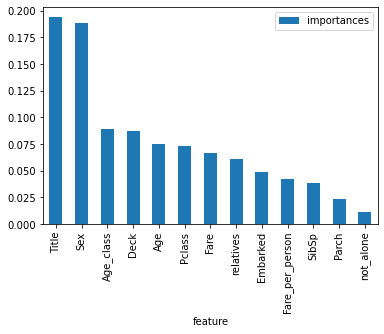

In [58]:
importances.plot.bar()

## Remove some features

In [59]:
#Remove not_alone and Parch features
train_data = train_data.drop(['not_alone', 'Parch'], axis=1)
test_data = test_data.drop(['not_alone', 'Parch'], axis=1)

In [60]:
#Train Random forest again
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

92.59

In [61]:
print('oob score', round(random_forest.oob_score_, 4)*100, '%')

oob score 81.26 %


## Hyperparameter Tuning

In [62]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
#               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
#               "n_estimators": [100, 400, 700, 1000, 1500]}

# from sklearn.model_selection import GridSearchCV
# rf = RandomForestClassifier(n_estimators=100, max_features='auto',
#                             oob_score=True, random_state=1, n_jobs=1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=1)
# clf.fit(x_train, y_train)
# clf.best_params_

In [63]:
#Test New Parameters
#Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
print('oob score: ', round(random_forest.oob_score_, 4)*100, '%')

oob score:  82.83 %


## Further Evaluation

### Confusion Matrix

In [64]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[495,  54],
       [ 91, 251]], dtype=int64)

### Precision and Recall

In [65]:
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(y_train, predictions))
print("Recall: ", recall_score(y_train, predictions))

Precision:  0.8229508196721311
Recall:  0.7339181286549707


### F-Score

In [66]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7758887171561051

### Precision and Recall Curve 

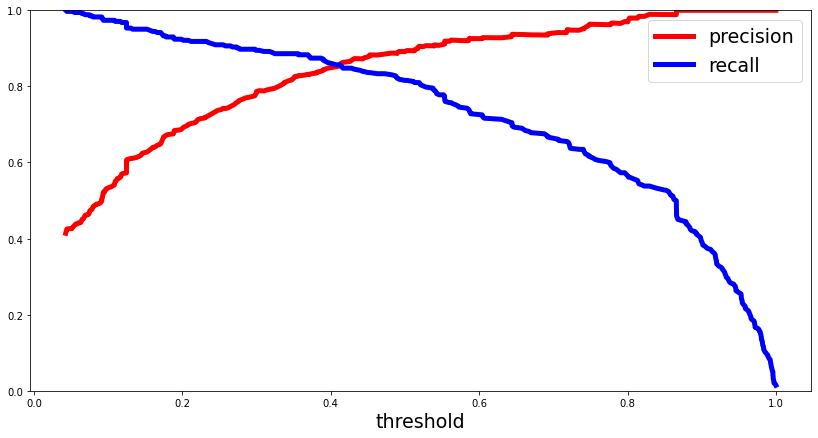

In [67]:
from sklearn.metrics import precision_recall_curve
#Getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:, 1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], 'b', label='recall',
            linewidth=5)
    plt.xlabel('threshold', fontsize=19)
    plt.legend(loc='upper right', fontsize=19)
    plt.ylim([0, 1])
    
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

### Plot the precision and recall against each other

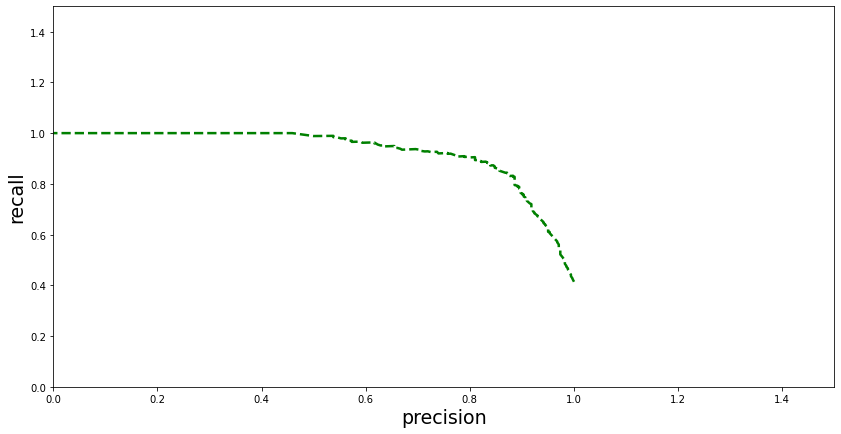

In [68]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, 'g--', linewidth=2.5)
    plt.ylabel('recall', fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

## ROC AUC Curve

This curve plots the true positive rate (recall) against the false positive rate 
(ratio of incorrectly classified negative instances) instead of plotting the precision
versus the recall

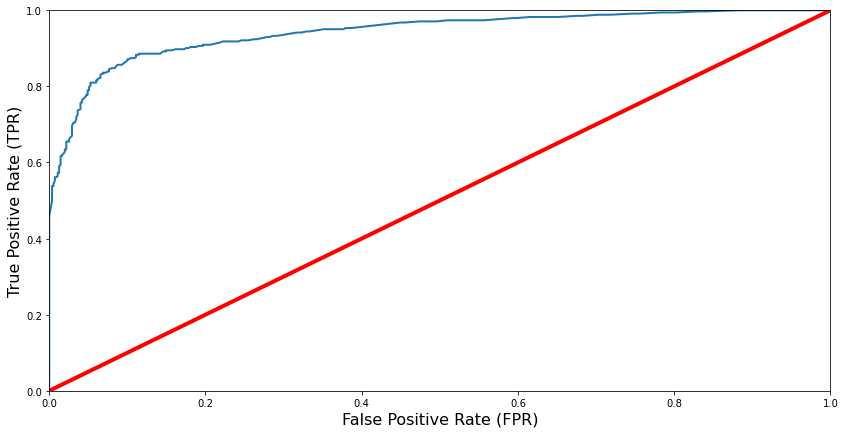

In [70]:
from sklearn.metrics import roc_curve
#Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

#Plotting them against each other 
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## ROC AUC Score

In [71]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print('ROC-AUC-Score: ', r_a_score)

ROC-AUC-Score:  0.942114317365971
